In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft

from matplotlib.ticker import ScalarFormatter


def dB(x):
    return 20*np.log10(x)

(0.0010000200004000081, 100)

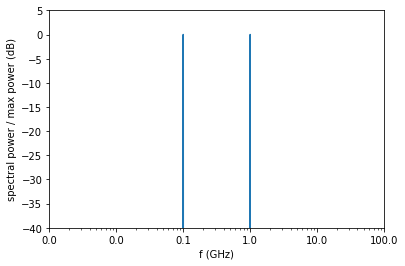

In [3]:

t = np.arange(0,1000e-9,10e-12) 

y = t*0

# test sinus at 100 MHz, 1 mV pkpk
y += 1e-3 * np.sin(2*np.pi*100e6*t)

# test sinus at 1 GHz, 1 mV pkpk
y += 1e-3 * np.sin(2*np.pi*1e9*t)



N = len(t)
T = t[1] -t[0]

yf = fft(y/1e-2)
yf = 2.0/N * np.abs(yf[0:N//2])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf/1e9, dB(yf/np.max(yf)) )
plt.xlabel("f (GHz)")
plt.xscale("log")
plt.ylabel("spectral power / max power (dB)")
plt.gca().axes.get_xaxis().set_major_formatter(ScalarFormatter())
plt.ylim(-40,5)
plt.xlim(0,100)